Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


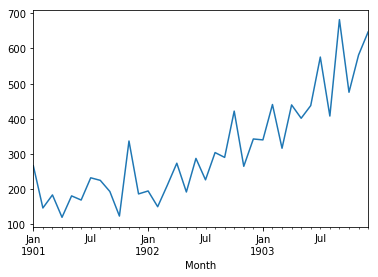

In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

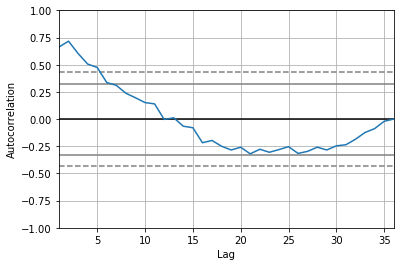

In [5]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 2)   Log Likelihood                -191.363
Method:                                                css-mle   S.D. of innovations             51.424
Date:                                         Thu, 10 Aug 2017   AIC                            400.726
Time:                                                 15:01:32   BIC                            414.724
Sample:                                             02-01-1901   HQIC                           405.558
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

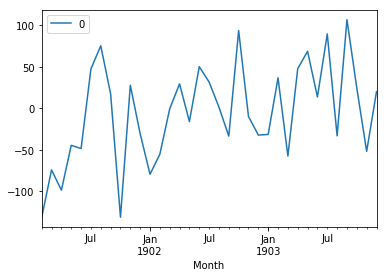

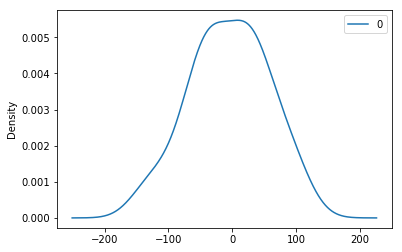

                0
count   35.000000
mean    -5.243803
std     60.783091
min   -131.706794
25%    -46.737967
50%     -0.735815
75%     34.085582
max    106.873820


In [14]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
# fit model
model = ARIMA(series, order=(5,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=426.752424, expected=342.300000
predicted=342.322641, expected=339.700000
predicted=415.575184, expected=440.400000
predicted=379.418328, expected=315.900000
predicted=393.701720, expected=439.300000
predicted=378.875176, expected=401.300000
predicted=497.615498, expected=437.400000
predicted=421.250761, expected=575.500000
predicted=505.199734, expected=407.600000
predicted=570.627632, expected=682.000000
predicted=529.954588, expected=475.300000


C:\Users\Trung\Miniconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=720.750939, expected=581.300000
predicted=613.988073, expected=646.900000
Test MSE: 6710.550


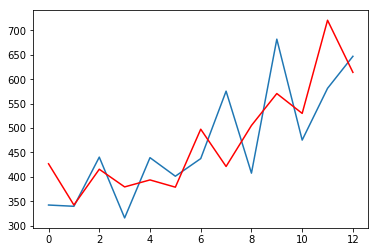

In [27]:
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()